# Implementation of Regula Falsi Method with tabulated values


In [30]:
#checking if a float is equal to zero?

Date    : 02/21/2022 

Author  : Mukesh Tiwari

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from tabulate import tabulate
%matplotlib notebook

In [32]:
#Recursive Implementation

def bisection_recur(f , a , b ,eps):
    
    #check if the initial values a and b are valid
    assert a != b , 'Null Interval'
    assert f(a) * f(b) <= 0 , 'Function has same sign for both values'
    
    if f(a) == 0.0:
            return a
    if f(b) == 0.0:
            return b
        
    mid = (a*f(b) - b* f(a)) / (f(b) - f(a))
    print(mid)
    
    if( abs(b-a) < eps):
        return mid
    
    elif f(mid) * f(a) < 0:
        b = mid
        ans = bisection_recur(f,a,b,eps)
        
    elif f(mid) * f(b) < 0:
        a = mid
        ans = bisection_recur(f,a,b,eps)
    return ans
 
        

In [33]:
#conditional loop Implementation

def bisection_while(f , a , b ,eps , verbose=True):  
    #check if the initial values a and b are valid
    assert a != b , 'Null Interval'
    assert f(a) * f(b) <= 0 , 'Function has same sign for both values'
    
    if f(a) == 0.0:
            return a
    if f(b) == 0.0:
            return b
        
    mid = (a*f(b) - b* f(a)) / (f(b) - f(a))   
    
    i = 1
    #create the lists
    iter_number = [1]
    a_values = [a]
    sign_fa =[np.sign(f(a))]
    b_values = [b]
    sign_fb = [np.sign(f(b))]
    mid_values = [mid]
    f_mid = [f(mid)]
    error = [b - a]
    
    while(abs(a-b) > eps):
        mid = (a*f(b) - b* f(a)) / (f(b) - f(a)) 
        if f(mid) * f(a) < 0:
            b = mid
        elif f(mid) * f(b) < 0:
            a = mid
        i = i + 1
        iter_number.append(i)
        a_values.append(a)
        sign_fa.append(np.sign(f(a)))
        b_values.append(b)
        sign_fb.append(np.sign(f(b)))
        mid_values.append(mid)
        f_mid.append(f(mid))
        error.append(b - a)
    
    if(verbose == True):
        table = list(zip(iter_number , a_values , sign_fa , b_values ,sign_fb , x_intercept , f_mid , error))
        print(tabulate(table , headers=['iter#' , 'a' , 'sgn(f(a))' , 'b' , 'sgn(f(b))' , 'mid-value' , 'f(mid)' , 'error']))
    
    return mid

In [34]:
#Imperative loop Implementation

def bisection_for(f , a , b ,eps , verbose=True):
    #check if the initial values a and b are valid
    assert a != b , 'Null Interval'
    assert f(a) * f(b) <= 0 , 'Function has same sign for both values'
    
    if f(a) == 0.0:
            return a
    if f(b) == 0.0:
            return b
    
    n = math.ceil(math.log(abs(a-b) / eps) / math.log(2))
    
    #create the lists
    iter_number = []
    a_values = []
    sign_fa =[]
    b_values = []
    sign_fb = []
    mid_values = []
    f_mid = []
    error = []
    
    for i in range(0 , n+1):
        mid = (a*f(b) - b* f(a)) / (f(b) - f(a)) 
        
        #update the table
        iter_number.append(i)
        a_values.append(a)
        sign_fa.append(np.sign(f(a)))
        b_values.append(b)
        sign_fb.append(np.sign(f(b)))
        mid_values.append(mid)
        f_mid.append(f(mid))
        error.append(b - a)
        
        if f(mid) * f(a) < 0:
            b = mid
        elif f(mid) * f(b) < 0:
            a = mid
               
    if(verbose == True):
        table = list(zip(iter_number , a_values , sign_fa , b_values ,sign_fb , mid_values , f_mid , error))
        print(tabulate(table , headers=['iter#' , 'a' , 'sgn(f(a))' , 'b' , 'sgn(f(b))' , 'mid-value' , 'f(mid)' , 'error']))
    return mid

Algorithm for getting initial points


In [35]:
sign = lambda x: -1 if x < 0 else 1 

In [36]:
def get_initial_points(f):
    for i in range(1,10):
        x_vals = [random.randrange(-10*(2**i) , 10*(2**i)) for _ in range(0,100*i)]
        f_sgn = [sign(f(j)) for j in x_vals]
        if np.prod(f_sgn) == -1 :
            break
    
    for i in x_vals:
        for j in x_vals:
            if f(i)*f(j) < 0:
                return i,j
            

## verification 1

In [37]:
def func1(x):
    return (x**2 - 4)


<IPython.core.display.Javascript object>


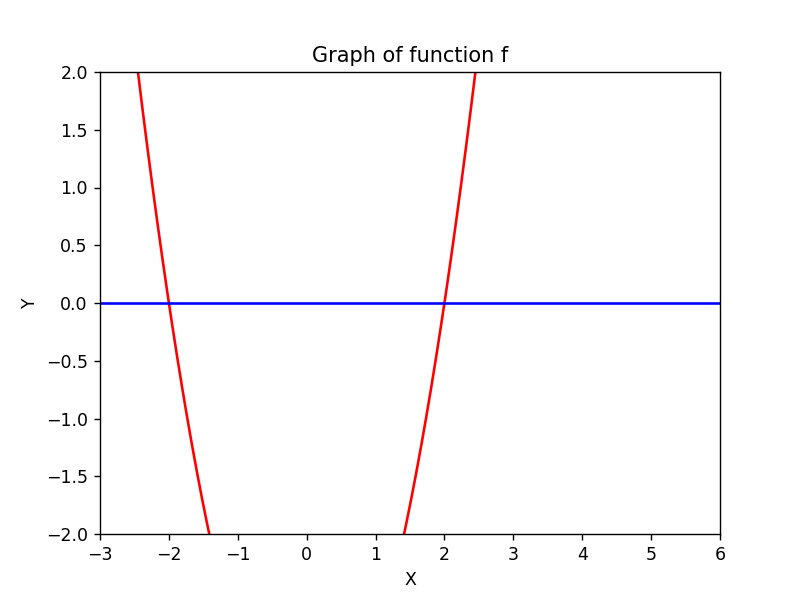

In [38]:
x_val = np.linspace(-3,6,250)
y_val = func1(x_val)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
graph = axes.plot(x_val , y_val , 'r')
x_axis = axes.plot(x_val,np.zeros(np.size(x_val)),'b')
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Graph of function f")
axes.set_xlim([-3, 6])
axes.set_ylim([-2, 2])
plt.show()

In [39]:
a,b = get_initial_points(func1)
print(min(a,b) , max(a,b))
print(bisection_recur(func1 , min(a,b) , max(a,b) , 0.00001))
print(bisection_while(func1 , min(a,b) , max(a,b) , 0.00001 , False))
print(bisection_for(func1 , min(a,b) , max(a,b) , 0.00001 , False))

-1 13


RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
ans = bisection_recur(func1 , 0 , 5 , 0.00001)
print(ans)

In [ ]:
ans = bisection_while(func1 , 0 , 5 , 0.00001,)
print(ans)

In [ ]:
ans = bisection_for(func1 , 0 , 5 , 0.00001)
print(ans)
print(ans - 2)

# # verification 2

In [43]:
def func2(x):
    return (x**3 - x - 1)

<IPython.core.display.Javascript object>


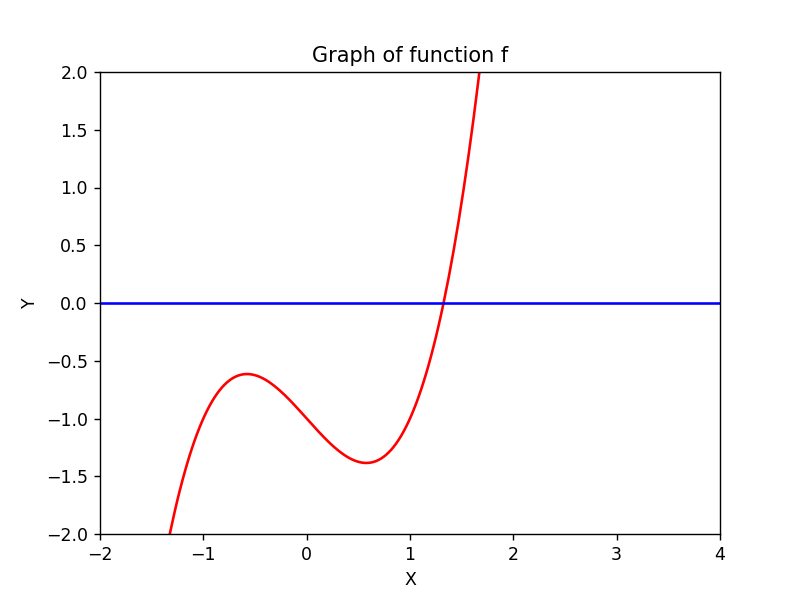

In [44]:
x_val = np.linspace(-2,4,250)
y_val = func2(x_val)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
graph = axes.plot(x_val , y_val , 'r')
x_axis = axes.plot(x_val,np.zeros(np.size(x_val)),'b')
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Graph of function f")
axes.set_xlim([-2, 4])
axes.set_ylim([-2, 2])
plt.show()

In [42]:
a,b = get_initial_points(func2)
print(min(a,b) , max(a,b))
print(bisection_recur(func2 , min(a,b) , max(a,b) , 0.00001))
print(bisection_while(func2 , min(a,b) , max(a,b) , 0.00001 ,False))
print(bisection_for(func2 , min(a,b) , max(a,b) , 0.00001 ,False))

-13 37


RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
ans = bisection_recur(func2 , 0 , 5 , 0.00000001)
print(ans)

In [45]:
ans = bisection_while(func2 , 0 , 5 , 0.00000001)
print(ans)

KeyboardInterrupt: 

In [ ]:
ans = bisection_for(func2 , 0 , 5 , 0.000000001)
print(ans)

# # verification 3

In [ ]:
def func3(x):
    return (x * np.e ** x - 1)

In [ ]:
x_val = np.linspace(-2,4,250)
y_val = func3(x_val)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
graph = axes.plot(x_val , y_val , 'r')
x_axis = axes.plot(x_val,np.zeros(np.size(x_val)),'b')
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Graph of function f")
axes.set_xlim([-2, 4])
axes.set_ylim([-2, 2])
plt.show()

In [ ]:
a,b = get_initial_points(func3)
print(min(a,b) , max(a,b))
print(bisection_recur(func3 , min(a,b) , max(a,b) , 0.00001))
print(bisection_while(func3 , min(a,b) , max(a,b) , 0.00001 ,False))
print(bisection_for(func3 , min(a,b) , max(a,b) , 0.00001 , False))

In [ ]:
ans = bisection_recur(func3 , 0 , 5 , 0.0005)
print(ans)

In [ ]:
ans = bisection_while(func3 , 0 , 5 , 0.0005)
print(ans)

In [ ]:
ans = bisection_for(func3 , 0 , 5 , 0.0005)
print(ans)

In [46]:
##Classwork lab 2/21/2022

In [47]:
def func4(x):
    return (x**2 - np.sin(x))

<IPython.core.display.Javascript object>


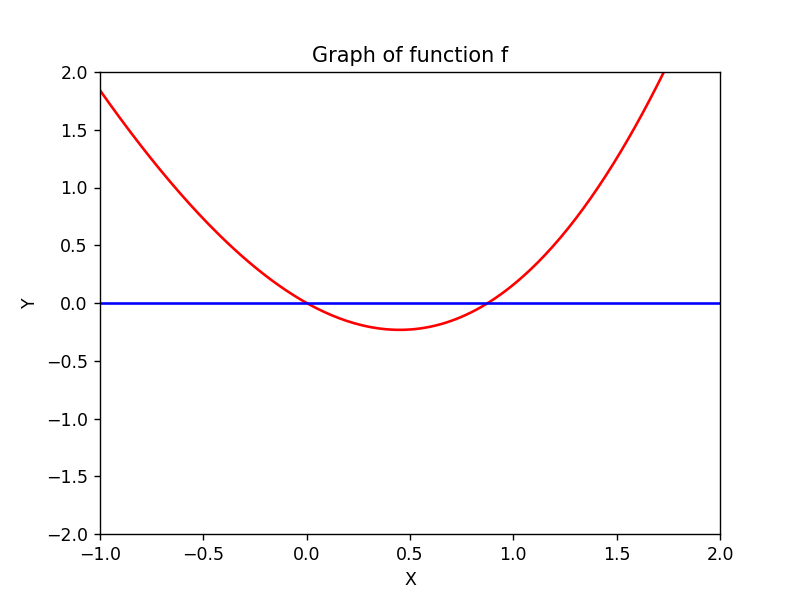

In [48]:
x_val = np.linspace(-1,2,250)
y_val = func4(x_val)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
graph = axes.plot(x_val , y_val , 'r')
x_axis = axes.plot(x_val,np.zeros(np.size(x_val)),'b')
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Graph of function f")
axes.set_xlim([-1, 2])
axes.set_ylim([-2, 2])
plt.show()

In [ ]:
ans = bisection_while(func4 , 0.5, 1 , 0.0005)
print(ans)

In [ ]:
type(get_initial_points(func4))

In [ ]:
a,b = get_initial_points(func4)
print(min(a,b) , max(a,b))
print(bisection_recur(func3 , min(a,b) , max(a,b) , 0.00001))
print(bisection_while(func3 , min(a,b) , max(a,b) , 0.00001 ,False))
print(bisection_for(func3 , min(a,b) , max(a,b) , 0.00001 , False))